In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [290]:

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('characters.csv', na_values=['NA', 'none'])

In [291]:
# Exibe um título para a seção de informações gerais do conjunto de dados
print("Descrição do Conjunto de Dados: Star Wars Characters")

# Texto explicativo sobre o conjunto de dados
print("Este conjunto de dados contém informações sobre personagens do universo Star Wars.")
print("Ele foi obtido a partir do Kaggle e inclui dados como altura, massa, cor do cabelo, cor da pele, cor dos olhos, ano de nascimento, gênero, planeta natal e espécie.")
print("Kaggle (https://www.kaggle.com/datasets/jsphyg/star-wars?select=characters.csv)")
print(f"Tamanho: {df.shape[0]} registros x {df.shape[1]} colunas")
print("Quantidade de Registros:", df.shape[0])
print("Linhas x Colunas:", df.shape)
print("\nPrimeiras 5 linhas:")
display(df.head())



Descrição do Conjunto de Dados: Star Wars Characters
Este conjunto de dados contém informações sobre personagens do universo Star Wars.
Ele foi obtido a partir do Kaggle e inclui dados como altura, massa, cor do cabelo, cor da pele, cor dos olhos, ano de nascimento, gênero, planeta natal e espécie.
Kaggle (https://www.kaggle.com/datasets/jsphyg/star-wars?select=characters.csv)
Tamanho: 87 registros x 10 colunas
Quantidade de Registros: 87
Linhas x Colunas: (87, 10)

Primeiras 5 linhas:


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,NaN,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human


In [292]:
# Contagem de dados faltantes por coluna
dados_faltantes = df.isnull().sum()

# Exibir colunas que possuem valores faltantes
print("\nColunas com Valores Faltantes:")
colunas_com_faltantes = dados_faltantes[dados_faltantes > 0].index
for coluna in colunas_com_faltantes:
    valores_faltantes = df[df[coluna].isnull()][['name', coluna]]
    print(f"\n{coluna}: {dados_faltantes[coluna]} valores faltantes")
    print("-" * 60)
    print(f"{'Nome do Personagem':<40} {'Índice':<10} {'Valor Faltante'}")
    print("-" * 60)
    for indice, row in valores_faltantes.iterrows():
        print(f"{row['name']:<40} {indice:<10} {row[coluna]}")
    print()




Colunas com Valores Faltantes:

height: 6 valores faltantes
------------------------------------------------------------
Nome do Personagem                       Índice     Valor Faltante
------------------------------------------------------------
Arvel Crynyd                             27         nan
Finn                                     81         nan
Rey                                      82         nan
Poe Dameron                              83         nan
BB8                                      84         nan
Captain Phasma                           85         nan


mass: 28 valores faltantes
------------------------------------------------------------
Nome do Personagem                       Índice     Valor Faltante
------------------------------------------------------------
Wilhuff Tarkin                           11         nan
Mon Mothma                               26         nan
Arvel Crynyd                             27         nan
Finis Valorum               

In [293]:
# Converter colunas 'mass', 'height' e 'birth_year' para tipos numéricos
numeric_columns = ['mass', 'height', 'birth_year']

for coluna in numeric_columns:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# Converter as demais colunas para tipos categóricos
categorical_columns = ['hair_color', 'skin_color', 'eye_color', 'gender', 'homeworld', 'species']

for coluna in categorical_columns:
    df[coluna] = df[coluna].astype('category')

# Exibir informações sobre os tipos de colunas após as transformações
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        87 non-null     object  
 1   height      81 non-null     float64 
 2   mass        58 non-null     float64 
 3   hair_color  44 non-null     category
 4   skin_color  84 non-null     category
 5   eye_color   84 non-null     category
 6   birth_year  0 non-null      float64 
 7   gender      82 non-null     category
 8   homeworld   77 non-null     category
 9   species     82 non-null     category
dtypes: category(6), float64(3), object(1)
memory usage: 8.5+ KB
None


In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da Massa
plt.figure(figsize=(8, 6))
sns.histplot(df['mass'].dropna(), bins=20, kde=True)
plt.title('Histograma da Massa')
plt.xlabel('Massa dos personagens (kg)')
plt.ylabel('Frequência')
plt.show()

# Explicação do gráfico de Massa
print("O gráfico exibe um histograma da massa dos personagens no conjunto de dados. Assim como no gráfico")
print("anterior, cada barra representa um intervalo de massa (bin) e a massa dos personagens é plotada nesses bins.")
print("A curva suave sobre as barras é a estimativa de densidade do kernel (KDE). Esse gráfico nos dá insights sobre")
print("a distribuição das massas, mostrando os intervalos de massa mais comuns e como a variação de massas está distribuída.")

# Gráfico de Contagem por Cor de Cabelo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hair_color', order=df['hair_color'].value_counts().index)
plt.title('Contagem por Cor de Cabelo')
plt.xlabel('Cor de Cabelo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Explicação do gráfico de Cor de Cabelo
print("O gráfico de contagem por cor de cabelo mostra quantos personagens possuem cada cor de cabelo.")
print("As barras representam as diferentes cores de cabelo e a altura de cada barra indica a quantidade de")
print("personagens com aquela cor de cabelo. Esse gráfico ajuda a entender a distribuição das cores de cabelo")
print("entre os personagens.")

# Obtendo as cores únicas da pele para a paleta de cores
unique_skin_colors = df['skin_color'].unique()
color_palette = sns.color_palette("husl", n_colors=len(unique_skin_colors))

# Gráfico de Contagem por Cor de Pele
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='skin_color', order=df['skin_color'].value_counts().index, palette=color_palette)
plt.title('Contagem por Cor de Pele')
plt.xlabel('Cor de Pele')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

# Adicionando legenda para as cores
legend_labels = [color if color != 'NA' else 'Desconhecida' for color in unique_skin_colors]
plt.legend(legend_labels, title='Cores de Pele', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Explicação do gráfico de Cor de Pele
print("O gráfico de contagem por cor de pele mostra quantos personagens possuem cada cor de pele.")
print("Cada barra colorida representa um tom de pele específico. A legenda à direita do gráfico")
print("associa as cores às tonalidades de pele correspondentes. Essa visualização nos ajuda a")
print("compreender a distribuição das cores de pele entre os personagens.")


# Gráfico de Contagem por Cor dos Olhos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='eye_color', order=df['eye_color'].value_counts().index)
plt.title('Contagem por Cor dos Olhos')
plt.xlabel('Cor dos Olhos')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Explicação do gráfico de Cor dos Olhos
print("O gráfico de contagem por cor dos olhos mostra quantos personagens possuem cada cor dos olhos.")
print("Também funciona de maneira semelhante aos gráficos anteriores, auxiliando a compreensão da distribuição")
print("das cores dos olhos entre os personagens.")


# Função para converter datas para anos
def convert_to_years(date):
    if isinstance(date, str):
        if date.endswith('BBY'):
            return -int(date.replace('BBY', ''))
        elif date.endswith('ABY'):
            return int(date.replace('ABY', ''))
    return np.nan
# Aplicar a função de conversão às datas de nascimento
df['birth_year_numeric'] = df['birth_year'].apply(convert_to_years)

# Filtrar valores válidos
valid_birth_years = df['birth_year_numeric'].dropna()

# Definir os limites do eixo x baseados nos valores da tabela
x_min = valid_birth_years.min()
x_max = valid_birth_years.max()

# Criar o gráfico do histograma
plt.figure(figsize=(10, 6))
sns.histplot(valid_birth_years, bins=20, kde=True)
plt.title('Histograma do Ano de Nascimento')
plt.xlabel('Ano de Nascimento (ABY/DBY)')
plt.ylabel('Frequência')
plt.axvline(x=0, color='red', linestyle='--', label='Batalha de Yavin')
plt.legend()
plt.xlim(x_min, x_max)  # Definir a escala do eixo x com base nos valores encontrados
plt.xticks(range(x_min, x_max + 1, 100))  # Definir marcações a cada 100 anos
plt.show()










# Gráfico de Contagem por Gênero
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)
plt.title('Contagem por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

# Explicação do gráfico de Gênero
print("O gráfico de contagem por gênero mostra quantos personagens pertencem a cada gênero.")
print("As barras representam os diferentes gêneros e a altura de cada barra indica a quantidade de")
print("personagens com aquele gênero. Esse gráfico auxilia na compreensão da distribuição de gêneros entre os personagens.")

# Obtendo a lista de planetas únicos e definindo uma paleta de cores
unique_homeworlds = df['homeworld'].unique()
color_palette = sns.color_palette("Set3", n_colors=len(unique_homeworlds))

# Gráfico de Contagem por Planeta de Origem
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='homeworld', order=df['homeworld'].value_counts().index, palette=color_palette)
plt.title('Contagem por Planeta de Origem')
plt.xlabel('Planeta de Origem')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

# Adicionando legenda para os planetas
legend_labels = [homeworld if homeworld != 'NA' else 'Desconhecido' for homeworld in unique_homeworlds]
plt.legend(legend_labels, title='Planetas de Origem', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Explicação do gráfico de Planeta de Origem
print("O gráfico de contagem por planeta de origem mostra quantos personagens são originários de cada planeta.")
print("Cada barra colorida representa um planeta específico. A legenda à direita do gráfico associa as cores")
print("aos planetas correspondentes. Essa visualização nos ajuda a compreender a distribuição dos planetas de origem dos personagens.")


# Gráfico de Contagem por Espécie
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='species', order=df['species'].value_counts().index)
plt.title('Contagem por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Explicação do gráfico de Espécie
print("O gráfico de contagem por espécie mostra quantos personagens pertencem a cada espécie.")
print("Funciona de maneira semelhante aos gráficos de gênero e planeta de origem, auxiliando na compreensão")
print("da distribuição das espécies entre os personagens.")




SyntaxError: invalid syntax (1645796154.py, line 102)

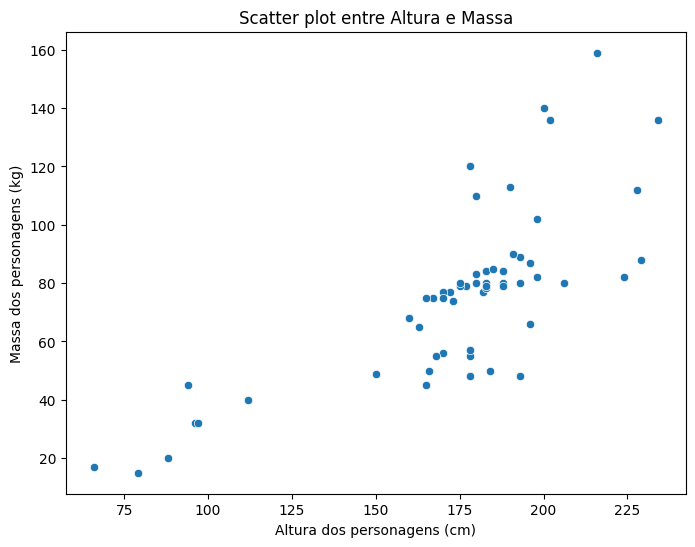

Este scatter plot mostra a relação entre a altura e a massa dos personagens no conjunto de dados.
Cada ponto no gráfico representa um personagem, onde o eixo x representa a altura em centímetros
e o eixo y representa a massa em quilogramas. A dispersão dos pontos no gráfico indica se existe
alguma relação entre altura e massa. Se os pontos estiverem agrupados de alguma forma, isso pode indicar
uma correlação entre as duas variáveis. Se os pontos estiverem dispersos, isso pode indicar que não há
uma relação clara entre altura e massa para os personagens.


In [ ]:
# Scatter plot entre Altura e Massa
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='mass', data=df.dropna(subset=['height', 'mass']))
plt.title('Scatter plot entre Altura e Massa')
plt.xlabel('Altura dos personagens (cm)')
plt.ylabel('Massa dos personagens (kg)')
plt.show()

# Explicação do gráfico
print("Este scatter plot mostra a relação entre a altura e a massa dos personagens no conjunto de dados.")
print("Cada ponto no gráfico representa um personagem, onde o eixo x representa a altura em centímetros")
print("e o eixo y representa a massa em quilogramas. A dispersão dos pontos no gráfico indica se existe")
print("alguma relação entre altura e massa. Se os pontos estiverem agrupados de alguma forma, isso pode indicar")
print("uma correlação entre as duas variáveis. Se os pontos estiverem dispersos, isso pode indicar que não há")
print("uma relação clara entre altura e massa para os personagens.")


In [ ]:
# Calcular estatísticas descritivas das variáveis numéricas
estatisticas_numericas = df.describe()

# Imprime estatísticas descritivas das variáveis numéricas
print('\nEstatísticas descritivas das variáveis numéricas:')
print(f"Altura:")
print(f"  Média: {estatisticas_numericas['height']['mean']:.2f} cm")
print(f"  Mediana: {estatisticas_numericas['height']['50%']:.2f} cm")
print(f"  Variância: {estatisticas_numericas['height']['std'] ** 2:.2f}")
print(f"  Desvio Padrão: {estatisticas_numericas['height']['std']:.2f}")
print("\nMassa:")
if 'mass' in estatisticas_numericas:
    print(f"  Média: {estatisticas_numericas['mass']['mean']:.2f} kg")
    print(f"  Mediana: {estatisticas_numericas['mass']['50%']:.2f} kg")
    print(f"  Variância: {estatisticas_numericas['mass']['std'] ** 2:.2f}")
    print(f"  Desvio Padrão: {estatisticas_numericas['mass']['std']:.2f}")
else:
    print("  Não há dados numéricos na coluna 'mass'")


    


Estatísticas descritivas das variáveis numéricas:
Altura:
  Média: 174.36 cm
  Mediana: 180.00 cm
  Variância: 1208.98
  Desvio Padrão: 34.77

Massa:
  Média: 75.58 kg
  Mediana: 79.00 kg
  Variância: 855.71
  Desvio Padrão: 29.25
